# Artificial Intelligence
# 464/664
# Assignment #3

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested, 
03. Each helper function should be preceeded by documentation (Markdown cell),
05. No comments in the code; anything worth mentioning should be included in the documentation,
06. Keep functions to 20 lines or less (including empty lines so do not add any),
08. Use descriptive variable names,
09. Functions should do only one thing,
10. Check submission deadline on Gradescope, 
11. Rename the file to Last_First_assignment_2, 
12. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
13. Do not submit any other files.


## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Each helper function should be followed by three assert-style unit tests.


## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

# Problem #1: Multiagent Systems

## The World

A `List of Lists` is used to represent the world. Cells marked as '⬛' are obstacles in the world and are not traversable.

In [1]:
world = [
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜']]

In [2]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Robot

Our robot '🤖' starts at the bottom left and can either move up, down, left, or right. It's looking for the '❤️' in the world. 

In [3]:
MOVES = [(-1,0), (0,1), (1,0), (0,-1)] # Up Right Down Left

In [4]:
start = (len(world)-1, 0)

In [5]:
goal = (0, len(world)-1)

## Other Agents

There are four other agents in the world: '🚎', '🚎', '🚎', and '🚎'.

In [6]:
# Update the world with this information
world[start[0]][start[1]] = '🤖'
world[start[0]][start[1]+2] = '🚎'
world[start[0]][start[1]+4] = '🚎'
world[start[0]][start[1]+6] = '🚎'
world[start[0]][start[1]+8] = '🚎'
world[goal[0]][goal[1]] = '❤️'

In [7]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜🚎⬜🚎⬜🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Problem #1


'🤖' is your robot from Assignment #1 and uses the A$^*$ search function to find the optimal path to goal. Each '🚎' has no such capability; all it can do is swarm. Each '🚎' uses Boids Rules (repulsion and attraction only) with another '🚎' and '🤖'. Implement this multiagent system consisting of an intelligent '🤖' robot and four '🚎' agents. 

* Our A$^*$ robot '🤖' does not use Boids Rule, but is the de-facto leader of the swarm since the '🚎' agents swarm with it. 

* Print out the resulting view of the world ('🤖', '🚎', '⬛', and '❤️' icons) **for each step** '🤖' takes on its way to '❤️'. (Assignment #1 only asked for the final output. This assignment asks for a print of the world after each step taken by '🤖'.)

* Use a repulsion range of 2 and a suitable attraction range that keeps the swarm together.

* '🚎' shouldn't leave the world

* '🚎' locations may need to be rounded when placed on the world for printing

## Import Statements

These import statements bring in external modules and functions that provide additional functionality for managing deep copies, queues, and mathematical operations.

---

### `from copy import deepcopy`

Imports the `deepcopy` function from Python’s `copy` module. This function creates deep copies of objects, meaning that all nested objects are also copied. It ensures that changes to the copied object do not affect the original object, which is useful when working with complex data structures like the world or agents.

---

### `from collections import deque`

Imports `deque` from the `collections` module, a double-ended queue that allows for efficient appending and popping from both ends. This is typically used for implementing queues for breadth-first search (BFS) or other queue-based algorithms.

---

### `import math`

Imports the standard Python `math` module, which provides mathematical functions and constants. It is commonly used for operations like calculating distances and vector magnitudes in the simulation.

---

### `import queue`

Imports Python’s `queue` module, which provides a standard FIFO (First-In-First-Out) queue interface. This is used for managing tasks or operations in order, useful for simulations or agent-based modeling.

---

## Constants

The constants defined here represent fixed values and parameters used throughout the simulation, including agent starting positions and ranges for agent interactions.

---

### `COORDS = 0`
An index representing the coordinates of a node or agent.

### `PARENT = 1`
An index representing the parent node of the current node, used in tree-based or pathfinding algorithms.

### `UP_CHILD = 2`, `RIGHT_CHILD = 3`, `DOWN_CHILD = 4`, `LEFT_CHILD = 5`
Indexes representing the child nodes of the current node in each of the four cardinal directions (up, right, down, left).

### `ELEMENT = 6`
An index representing the element contained within a node, such as a wall (`⬛`), empty space (`⬜`), path (`🟩`), goal (`❤️`), or agent (`🤖`).

### `SLD = 7`
An index representing the straight-line distance (SLD) from the current node to the goal.

---

### `AGENT_1_START`, `AGENT_2_START`, `AGENT_3_START`, `AGENT_4_START`

These tuples represent the starting positions of the four agents in the game. Each agent starts at a different horizontal position, with `AGENT_1_START` closest to the starting point (`start`), followed by the others in progressively more distant positions:
* **AGENT_1_START** = `(start[0], start[1]+2)`
* **AGENT_2_START** = `(start[0], start[1]+4)`
* **AGENT_3_START** = `(start[0], start[1]+6)`
* **AGENT_4_START** = `(start[0], start[1]+8)`

---

### `REPULSIVE_RANGE = 2`
The distance within which agents experience repulsive forces from each other, causing them to move apart.

---

### `ATTRACTIVE_RANGE = 5`
The distance beyond which agents experience attractive forces, drawing them closer together. This constant can be adjusted to test different simulation behaviors (e.g., try setting it to 6).


In [8]:
from copy import deepcopy
from collections import deque
import math
import queue

# Constants
COORDS = 0
PARENT = 1
UP_CHILD = 2
RIGHT_CHILD = 3
DOWN_CHILD = 4
LEFT_CHILD = 5
ELEMENT = 6 # ⬛, ⬜, 🟨, 🟩, 🤖, or ❤️
SLD = 7 # sld to goal

AGENT_1_START = (start[0], start[1]+2)
AGENT_2_START = (start[0], start[1]+4)
AGENT_3_START = (start[0], start[1]+6)
AGENT_4_START = (start[0], start[1]+8)

REPULSIVE_RANGE = 2
ATTRACTIVE_RANGE = 5 # try 6 too

<a id="Agent"></a>
# Agent

The `Agent` class represents an agent in the game world, defined by its character, number (acting as a unique identifier), and position. Each agent has a starting position and can be identified by its character symbol and number.

### Parameters:
* **character** `str`: The character symbol representing the agent (e.g., 'A', 'B', etc.).
* **number** `int`: A unique identifier for the agent.
* **position** `Tuple[int, int]`: The initial position of the agent on the game board, represented as coordinates (row, column).

### Attributes:
* **character** `str`: The symbol representing the agent in the game world.
* **number** `int`: A unique identifier for the agent, used to differentiate between multiple agents.
* **position** `Tuple[int, int]`: The current position of the agent in the game world, stored as coordinates.

### Methods:

---

<a id="agent_constructor"></a>
### `__init__(character, number, position)`

Initializes the attributes of the `Agent` class, setting the agent's character, number, and initial position.

* **character** `str`: The character representing the agent (e.g., 'A', 'B', etc.).
* **number** `int`: A unique identifier for the agent.
* **position** `Tuple[int, int]`: The initial position of the agent on the game board.

**returns** None.

---

This class does not have any additional public methods.


In [9]:
class Agent:
    
    def __init__(self, character, number, position):
        self.character = character
        self.number = number
        self.position = position

<a id="Snapshot"></a>
# Snapshot

The `Snapshot` class represents a snapshot of the game world, including the positions of agents and the state of the world grid. It manages agent movements, checks for out-of-bounds conditions, and prints the current state of the game world.

### Parameters:
* **world** `List[List[str]]`: The 2D grid representing the game world. Each cell contains an element indicating the environment (e.g., empty space, walls, or agents).
* **agents** `List[Agent]`: A list of agent objects that are part of the snapshot. The first agent in the list is considered the leader.

### Attributes:
* **world** `List[List[str]]`: The 2D grid of the game world, updated based on agent movements.
* **agents** `List[Agent]`: A list of agent objects, each representing an agent in the game.
* **leader** `Agent`: The leading agent, which is always the first agent in the `agents` list.

### Methods:

---

<a id="snapshot_constructor"></a>
### `__init__(world, agents)`

Initializes the snapshot with the given world and agents. The first agent in the agents list is set as the leader.

* **world** `List[List[str]]`: The 2D grid representing the world.
* **agents** `List[Agent]`: The list of agents in the game.

**returns** None.

---

<a id="out_of_bounds"></a>
### `__out_of_bounds(coordinates)`

Checks whether the given coordinates are out of bounds in the game world.

* **coordinates** `Tuple[int, int]`: The coordinates to check.

**returns** `bool`: True if the coordinates are outside the bounds of the world grid, otherwise False.

---

<a id="insert_agents"></a>
### `insert_agents(agent_positions)`

Updates the positions of all agents based on the provided list of positions.

* **agent_positions** `List[Tuple[int, int]]`: A list of new positions for the agents. The position at index `i` corresponds to the agent at index `i` in the `agents` list.

**returns** None.

---

<a id="make_move"></a>
### `make_move(curr_position, force_vector)`

Calculates a new position for an agent by applying a force vector to its current position. If the new position is out of bounds, the agent remains in its current position.

* **curr_position** `Tuple[int, int]`: The agent's current position.
* **force_vector** `Tuple[int, int]`: The vector to apply to the agent's position.

**returns** `Tuple[int, int]`: The new position of the agent. If the new position is out of bounds, returns the current position.

---

<a id="print_world"></a>
### `print_world()`

Prints the current state of the world, updating the grid with the positions of all agents. Non-leader agents' positions are rounded and inserted into the world grid for display.

**returns** None.


In [10]:
class Snapshot:
    
    def __init__(self, world, agents):
        self.world = world
        self.agents = agents
        self.leader = self.agents[0]
        
    def __out_of_bounds(self, coordinates):
        x = coordinates[0]
        y = coordinates[1]
        return (x < 0 or x >= len(self.world)) or (y < 0 or y >= len(self.world[0]))
        
    def insert_agents(self, agent_positions):
        for i in range(len(agent_positions)):
            self.agents[i].position = agent_positions[i]
            
    def make_move(self, curr_position, force_vector):
        new_position = vector_addition(curr_position, force_vector)
        rounded_position = vector_rounding(new_position)
        if self.__out_of_bounds(rounded_position):
            return curr_position
        return new_position
        
    def print_world(self):
        for agent in self.agents:
            if not agent == self.leader:
                rounded_position = vector_rounding(agent.position)
                self.world[int(rounded_position[0])][int(rounded_position[1])] = agent.character
        for row in self.world:
            print("".join(row))    

<a id="vector_rounding"></a>
## vector_rounding 

This function rounds the elements of a vector.

* **arg_1** vec: vector to be rounded

**returns** 

* **sld** Tuple: the resultant vector

In [11]:
def vector_rounding(vec):
    return (int(round(vec[0], 0)), int(round(vec[1],0)))

<a id="vector_addition"></a>
## vector_addition 

This function performs vector addition on two vectors.

* **arg_1** vec_1: first vector 
* **arg_2** vec_2: second vector

**returns** 

* **sld** Tuple: the resultant vector

In [12]:
def vector_addition(vec_1, vec_2):
    return (vec_1[0] + vec_2[0], vec_1[1] + vec_2[1])

<a id="vector_subtraction"></a>
## vector_subtraction 

This function performs vector subtraction on two vectors.

* **arg_1** vec_1: first vector 
* **arg_2** vec_2: second vector

**returns** 

* **sld** Tuple: the resultant vector

In [13]:
def vector_subtraction(vec_1, vec_2):
    return (vec_1[0] - vec_2[0], vec_1[1] - vec_2[1])

<a id="scaler_division"></a>
## scaler_division 

This function performs scaler division on a vector.

* **arg_1** vec: vector 
* **arg_2** divisor: scaler divisor 

**returns** 

* **sld** Tuple: the resultant vector

In [14]:
def scaler_division(vec, divisor):
    return (vec[0] / divisor, vec[1] / divisor) if not divisor == 0 else (0,0)

<a id="scaler_multiplication"></a>
## scaler_multiplication 

This function performs scaler multiplication on a vector.

* **arg_1** vec: vector 
* **arg_2** multiplier: scaler multiplier 

**returns** 

* **sld** Tuple: the resultant vector

In [15]:
def scaler_multiplication(vec, multiplier):
    return (vec[0] * multiplier, vec[1] * multiplier)

<a id="magnitude"></a>
## magnitude 

This function finds the magnitude of a vector.

* **arg_1** vec: vector in question

**returns** 

* **sld** num: the vector's magnitude

In [16]:
def magnitude(vec):
    return math.sqrt(vec[0]**2 + vec[1]**2)

<a id="get_sld"></a>
## get_sld 

This function finds the straightline distance between two positions using distance formula.

* **arg_1** pos_1: first position 
* **arg_2** pos_2: second position

**returns** 

* **sld** num: a decimal number that is the straightline distance between positions 1 and 2

In [17]:
def get_sld(pos_1, pos_2):
    return math.sqrt((pos_2[0] - pos_1[0]) ** 2 + (pos_2[1] - pos_1[1]) ** 2)

<a id="initialize_nodes"></a>
## initialize_nodes

This function creates nodes (with default properties) dictionary from a world (list).

* **arg_1** nodes: nodes dictionary to be updated
* **arg_2** goal: goal used to calculate straight-line distance
* **arg_3** world: world to create nodes from

In [18]:
def initialize_nodes(nodes, goal, world):
    for row in range(len(world)):
        for col in range(len(world)): 
            node = (row, col)
            nodes[node] = [node, None, None, None, None, None, world[row][col], get_sld(node, goal)]

<a id="initialize_explored"></a>
## initialize_explored

This function creates a map of explored nodes, initializing all nodes to not explored (False). 

* **arg_1** explored: explored dictionary to be updated
* **arg_2** world: world to create nodes from

In [19]:
def initialize_explored(explored, world):
    for row in range(len(world)):
        for col in range(len(world)): 
            explored[(row, col)] = False

<a id="translate_world"></a>
## translate_world

This function creates a new world (2D array) from nodes dictionary info.

* **arg_1** nodes: nodes to be translated into world
* **arg_2** world: new world  

In [20]:
def translate_world(nodes, world):
    new_world = [ [0]*len(world) for i in range(len(world))]
    for row in range(len(world)):
        for col in range(len(world)): 
            new_world[row][col] = nodes[(row, col)][ELEMENT]
    return new_world

<a id="create_snapshots"></a>
## create_snapshots

This function traverses the path back from the goal to the start via parent nodes property.

* **arg_1** start: starting point of robot
* **arg_2** goal: goal of search algorithm 
* **arg_3** nodes: nodes within world  

In [21]:
def create_snapshots(start, goal, nodes, world):
    nodes[start][ELEMENT] = '⬜'
    curr_node = nodes[goal][COORDS]
    snapshots = deque()
    while not curr_node == None:
        nodes[curr_node][ELEMENT] = '🤖'
        if not curr_node == nodes[goal][COORDS]:
            nodes[goal][ELEMENT] = '❤️'
        snapshots.appendleft(Snapshot(translate_world(nodes, world), [Agent('🤖', 0, nodes[curr_node][COORDS]), Agent('🚎', 1, None), Agent('🚎', 2, None), Agent('🚎', 3, None), Agent('🚎', 4, None)]))
        nodes[curr_node][ELEMENT] = '⬜'
        curr_node = nodes[curr_node][PARENT]
    return snapshots

<a id="get_up_child"></a>
## get_up_child 

This function gets the upper child of a node in the world.

* **arg_1** node: node to get upper child of

**returns** 

* **up_child** node: the upper child of node

In [22]:
def get_up_child(node):
    ROW = 0
    COL = 1
    if node[COORDS][ROW] == 0:
        return None
    return (node[COORDS][ROW] - 1, node[COORDS][COL])

<a id="get_right_child"></a>
## get_right_child 

This function gets the right child of a node in the world.

* **arg_1** node: node to get right child of
* **arg_2** world: world to grab dimensions of

**returns** 

* **right_child** node: the right child of node

In [23]:
def get_right_child(node, world):
    ROW = 0
    COL = 1
    if node[COORDS][COL] == len(world[ROW]) - 1:
        return None
    return (node[COORDS][ROW], node[COORDS][COL] + 1)

<a id="get_down_child"></a>
## get_down_child 

This function gets the down child of a node in the world.

* **arg_1** node: node to get down child of
* **arg_2** world: world to grab dimensions of

**returns** 

* **down_child** node: the down child of node

In [24]:
def get_down_child(node, world):
    ROW = 0
    COL = 1
    if node[COORDS][ROW] == len(world) - 1:
        return None
    return (node[COORDS][ROW] + 1, node[COORDS][COL])

<a id="get_left_child"></a>
## get_left_child 

This function gets the left child of a node in the world.

* **arg_1** node: node to get left child of

**returns** 

* **left_child** node: the left child of node

In [25]:
def get_left_child(node):
    ROW = 0
    COL = 1
    if node[COORDS][COL] == 0:
        return None
    return (node[COORDS][ROW], node[COORDS][COL] - 1)

<a id="handle_up_child"></a>
## handle_up_child

This function handles operations on the up child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of up child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [26]:
def handle_up_child(nodes, node, explored, frontier, timestamp=0):
    up_child = get_up_child(nodes[node])
    if not up_child == None:
        if not nodes[up_child][ELEMENT] == '⬛' and not explored[up_child]:
            nodes[node][UP_CHILD] = up_child
            nodes[up_child][PARENT] = node
            frontier.put((nodes[up_child][SLD], (timestamp, up_child)))
            explored[up_child] = True

<a id="handle_right_child"></a>
## handle_right_child

This function handles operations on the right child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of right child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [27]:
def handle_right_child(nodes, node, explored, frontier, timestamp=0):
    right_child = get_right_child(nodes[node], world)
    if not right_child == None:
        if not nodes[right_child][ELEMENT] == '⬛' and not explored[right_child]:
            nodes[node][RIGHT_CHILD] = right_child
            nodes[right_child][PARENT] = node
            frontier.put((nodes[right_child][SLD], (timestamp, right_child)))
            explored[right_child] = True

<a id="handle_down_child"></a>
## handle_down_child

This function handles operations on the down child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of down child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [28]:
def handle_down_child(nodes, node, explored, frontier, timestamp=0):
    down_child = get_down_child(nodes[node], world)
    if not down_child == None:
        if not nodes[down_child][ELEMENT] == '⬛' and not explored[down_child]:
            nodes[node][DOWN_CHILD] = down_child
            nodes[down_child][PARENT] = node
            frontier.put((nodes[down_child][SLD], (timestamp, down_child)))
            explored[down_child] = True

<a id="handle_left_child"></a>
## handle_left_child

This function handles operations on the left child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of left child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [29]:
def handle_left_child(nodes, node, explored, frontier, timestamp=0):
    left_child = get_left_child(nodes[node])
    if not left_child == None:
        if not nodes[left_child][ELEMENT] == '⬛' and not explored[left_child]:
            nodes[node][LEFT_CHILD] = left_child
            nodes[left_child][PARENT] = node
            frontier.put((nodes[left_child][SLD], (timestamp, left_child)))
            explored[left_child] = True

<a id="initialize_search"></a>
## initialize_search

This function initializes variables needed for searching graph.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** explored: dictionary holding explored status of nodes
* **arg_3** frontier: data structure holding nodes to be checked
* **arg_4** start: start node for robot spawn
* **arg_5** goal: goal to serach for by robot
* **arg_6** world: world in which robot and goal dwell
* **arg_7** timestamp: counter to ensure FIFO for priority queue

In [30]:
def initialize_search(nodes, explored, frontier, start, goal, world, timestamp=0):
    initialize_nodes(nodes, goal, world)
    initialize_explored(explored, world)
    explored[start] = True
    frontier.put((nodes[start][SLD], (timestamp, start)))

<a id="a_star_search"></a>
## a_star_search

This function executes a variant of Breadth-First Search, utilizing a PriorityQueue to handle all frontier operations. A PriorityQueue is used because it is a FIFO data structure and the A* algorithm requires that children nodes be visited in the order of increasing straightline distance from the goal, using an accpetable heuristic that allows it to more-efficiently look for goal. Nodes are popped from the Queue such that the move priority (Up, Right, Down, & Left) is preserved.

* **world**: the search area
* **start**: the starting location of the robot
* **goal**: the goal location in the search area

**returns** None (but prints out a nice view of the world and replaces appropriate cells using '🟨' and '🟩').

In [31]:
def a_star_search(world, start, goal):
    nodes, explored, frontier, timestamp, NODE = {}, {}, queue.PriorityQueue(), 0, 1
    initialize_search(nodes, explored, frontier, start, goal, world, timestamp)
    timestamp = timestamp + 1
    while not frontier.empty():
        node = frontier.get()[1][NODE]
        if node == goal:
            break  
        else:
            handle_up_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
            handle_right_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
            handle_down_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
            handle_left_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
    return create_snapshots(start, goal, nodes, world)

In [32]:
a_star_world = deepcopy(world)
a_star_world[AGENT_1_START[0]][AGENT_1_START[1]] = '⬜'
a_star_world[AGENT_2_START[0]][AGENT_2_START[1]] = '⬜'
a_star_world[AGENT_3_START[0]][AGENT_3_START[1]] = '⬜'
a_star_world[AGENT_4_START[0]][AGENT_4_START[1]] = '⬜'
snapshots = a_star_search(a_star_world, start, goal)

<a id="Simulation"></a>
# Simulation

The `Simulation` class represents the overall simulation of agent movements over multiple snapshots. It manages the agents' positions and computes movement based on repulsive and attractive forces between agents.

### Parameters:
* **snapshots** `List[Snapshot]`: A list of snapshots, each representing the state of the world and agent positions at different points in the simulation.
* **repulsive_range** `float`: The distance within which agents experience repulsive forces from each other, causing them to move apart.
* **attractive_range** `float`: The distance beyond which agents experience attractive forces, causing them to move closer together.

### Attributes:
* **snapshots** `List[Snapshot]`: A list of snapshots representing the progression of the simulation over time.
* **repulsive_range** `float`: The threshold distance for repulsive forces between agents.
* **attractive_range** `float`: The threshold distance for attractive forces between agents.

### Methods:

---

<a id="simulation_constructor"></a>
### `__init__(snapshots, repulsive_range, attractive_range)`

Initializes the `Simulation` with the given list of snapshots and the ranges that define the repulsive and attractive forces between agents.

* **snapshots** `List[Snapshot]`: The list of snapshots representing the state of the world over time.
* **repulsive_range** `float`: The distance within which agents repel each other.
* **attractive_range** `float`: The distance beyond which agents are attracted to each other.

**returns** None.

---

<a id="run"></a>
### `run()`

Executes the simulation by iterating through the snapshots and calculating the new positions for agents based on repulsive and attractive forces between them. For each agent, the force vector is calculated based on the distance to other agents. Agents within the repulsive range are pushed apart, while those beyond the attractive range are drawn closer.

* **calculates**: New positions for each agent in each snapshot (except the leader) based on the computed force vectors.

**returns** None.

---

<a id="print_results"></a>
### `print_results()`

Prints the results of the simulation by iterating through the snapshots and displaying the world grid at each stage of the simulation. The positions of the agents are updated on the grid and displayed as part of the output.

**returns** None.


In [33]:
class Simulation:
    def __init__(self, snapshots, repulsive_range, attractive_range):
        self.snapshots = snapshots
        self.repulsive_range = repulsive_range
        self.attractive_range = attractive_range
        
    def run(self):
        for i in range(len(snapshots)-1):
            snapshot = snapshots[i]
            if i == 0:
                snapshot.insert_agents([start, AGENT_1_START, AGENT_2_START, AGENT_3_START, AGENT_4_START])
            for j in range(len(snapshot.agents)):
                curr_agent = snapshot.agents[j]
                if not curr_agent == snapshot.leader:
                    force_vector = (0,0)
                    for other_agent in snapshot.agents:
                        distance = get_sld(curr_agent.position, other_agent.position)
                        displacement = vector_subtraction(curr_agent.position, other_agent.position)
                        if distance <= REPULSIVE_RANGE:
                            force_vector = vector_addition(force_vector, displacement)
                        elif distance >= ATTRACTIVE_RANGE:
                            force_vector = vector_subtraction(force_vector, displacement)
                    unit_force_vector = scaler_division(force_vector, magnitude(force_vector))
                    new_position = snapshot.make_move(curr_agent.position, unit_force_vector)
                    snapshots[i+1].agents[j].position = new_position

    def print_results(self):
        for i in range(len(self.snapshots)):
            print(f'Snapshot {i}:')
            self.snapshots[i].print_world()
            print('-----------------------------------')


In [34]:
simulation = Simulation(snapshots, REPULSIVE_RANGE, ATTRACTIVE_RANGE)
simulation.run()
simulation.print_results()

Snapshot 0:
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜🚎⬜🚎⬜🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
-----------------------------------
Snapshot 1:
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜🚎🚎🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
--------------

# Problem #2: Game Theory

We are designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [35]:
import random
import matplotlib.pyplot as plt

In [36]:
# The actions available to each player. Don't modify. 
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history. Don't modify. 
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is hardcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the input is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [37]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: Help players pick actions based on the <i>Best Response with inertia</i> algorithm described above (instead of just picking 'S' like they are now). 
    </p>
</div>

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [38]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        for day in range(num_days):
            high_probability = 0.75
            if day == 0:
                action_P1, action_P2 = random.choice(actions_P1), random.choice(actions_P2)
            else:
                yesterday = (trial * num_days) + day - 1
                action_P1 = history_P2_action[yesterday] if random.random() <= high_probability else history_P1_action[yesterday]
                action_P2 = history_P1_action[yesterday] if random.random() <= high_probability else history_P2_action[yesterday]
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [39]:
# Parameters. Don't modify. Not even debug flag. 
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	S	H
0	1	S	S
0	2	S	S
0	3	S	S
0	4	S	S
0	5	S	S
0	6	S	S
0	7	S	S
0	8	S	S
0	9	S	S
--------------------------
1	0	S	H
1	1	H	S
1	2	S	S
1	3	S	S
1	4	S	S
1	5	S	S
1	6	S	S
1	7	S	S
1	8	S	S
1	9	S	S
--------------------------
2	0	H	S
2	1	S	H
2	2	H	S
2	3	S	H
2	4	H	S
2	5	S	S
2	6	S	S
2	7	S	S
2	8	S	S
2	9	S	S
--------------------------
3	0	H	H
3	1	H	H
3	2	H	H
3	3	H	H
3	4	H	H
3	5	H	H
3	6	H	H
3	7	H	H
3	8	H	H
3	9	H	H
--------------------------
4	0	H	S
4	1	S	H
4	2	S	S
4	3	S	S
4	4	S	S
4	5	S	S
4	6	S	S
4	7	S	S
4	8	S	S
4	9	S	S
--------------------------
5	0	S	H
5	1	H	S
5	2	S	S
5	3	S	S
5	4	S	S
5	5	S	S
5	6	S	S
5	7	S	S
5	8	S	S
5	9	S	S
--------------------------
6	0	H	S
6	1	H	H
6	2	H	H
6	3	H	H
6	4	H	H
6	5	H	H
6	6	H	H
6	7	H	H
6	8	H	H
6	9	H	H
--------------------------
7	0	H	S
7	1	S	H
7	2	S	S
7	3	S	S
7	4	S	S
7	5	S	S
7	6	S	S
7	7	S	S
7	8	S	S
7	9	S	S
--------------------------
8	0	H	H
8	1	H	H
8	2	H	H
8	3	H	H
8	4	H	H
8	5	H	H
8	6	H	H
8	7	H	H
8	8	H	H
8	

<a id="plot_results"></a>
## plot_results

This functions plots the results of an experiment using a bar chart.

* **history_P1_action** List[Str]: The history of Player 1's actions over the course of the experiment 
* **history_P2_action** List[Str]: The history of Player 2's actions over the course of the experiment 


**returns** 

None

In [40]:
def plot_results(history_P1_action, history_P2_action):
    labels = ['(S,S)', '(S,H)', '(H,S)', '(H,H)']
    cell_counts = [0, 0, 0, 0]
    for i in range(len(history_P1_action)):
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'S':
            cell_counts[0]+=1
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'H':
            cell_counts[1]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'S':
            cell_counts[2]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'H':
            cell_counts[3]+=1
    plt.bar(labels, cell_counts)
    plt.show()

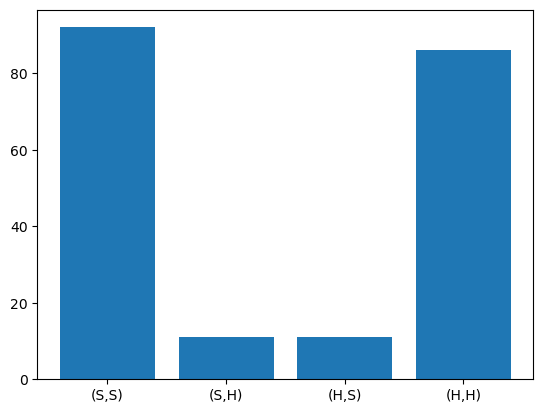

In [41]:
# Visualize the results. Don't modify. 
plot_results(history_P1_action, history_P2_action)

| Question | Response | 
|------|------|
|Where do agents get spend most of their time? | Choose one (leave your choice here and remove the other two choices): 
* Roughly 50-50 between (S,S) and (H,H)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".